In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from statistics import mean

In [36]:
Train_data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/House%20Prices%20-%20Advanced%20Regression%20Techniques/train.csv", index_col="Id")
Train_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [37]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [38]:
null_rows = Train_data.shape[0] - Train_data.dropna(axis=0).shape[0]
null_rows

1460

In [39]:
Test_data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/House%20Prices%20-%20Advanced%20Regression%20Techniques/test.csv", index_col="Id")
Test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [40]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [41]:
All_Data = pd.concat([Train_data, Test_data])
All_Data.drop('SalePrice', axis=1, inplace=True)
All_Data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [42]:
All_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [43]:
percent = 5
min_count =  int( ((100-percent)/100) * All_Data.shape[0] )
print("Columns that have No Null values less than ", min_count," will drop it")
print("--"*25 )
All_Data.dropna(axis=1, thresh=min_count).info()

Columns that have No Null values less than  2773  will drop it
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotArea        2919 non-null   int64  
 3   Street         2919 non-null   object 
 4   LotShape       2919 non-null   object 
 5   LandContour    2919 non-null   object 
 6   Utilities      2917 non-null   object 
 7   LotConfig      2919 non-null   object 
 8   LandSlope      2919 non-null   object 
 9   Neighborhood   2919 non-null   object 
 10  Condition1     2919 non-null   object 
 11  Condition2     2919 non-null   object 
 12  BldgType       2919 non-null   object 
 13  HouseStyle     2919 non-null   object 
 14  OverallQual    2919 non-null   int64  
 15  OverallCond    2919 non-nu

In [44]:
features_to_drop = []
features_to_impute = []

checkCond_Null = All_Data.shape[0] - min_count 

for c in All_Data.columns:
    if All_Data[c].isnull().sum() > checkCond_Null:
        features_to_drop.append(c)
    elif (All_Data[c].isnull().sum() <= checkCond_Null) & (All_Data[c].isnull().sum()!= 0.0):
        features_to_impute.append(c)

print("- We have ",len(features_to_impute),"features have small missing values in it. These columns are :\n\n", features_to_impute)
print('\n','--'*30,'\n')
print("- We have ",len(features_to_drop),"features have alot of missing values in it. These columns are :\n\n",features_to_drop)

- We have  23 features have small missing values in it. These columns are :

 ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'SaleType']

 ------------------------------------------------------------ 

- We have  11 features have alot of missing values in it. These columns are :

 ['LotFrontage', 'Alley', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [45]:
All_Data.shape

(2919, 79)

In [46]:
All_Data = All_Data.drop(features_to_drop, axis=1)
All_Data.shape

(2919, 68)

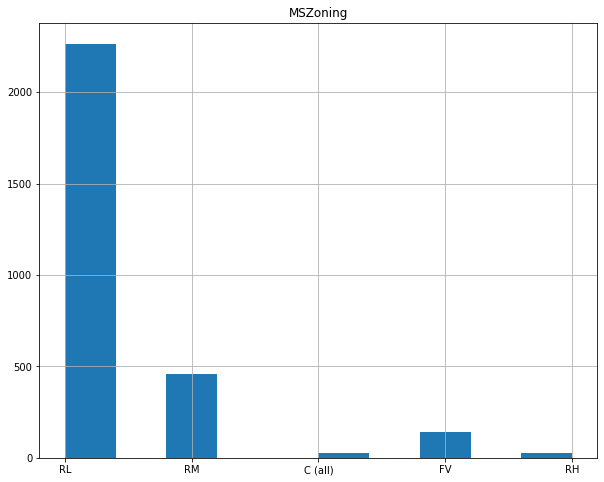

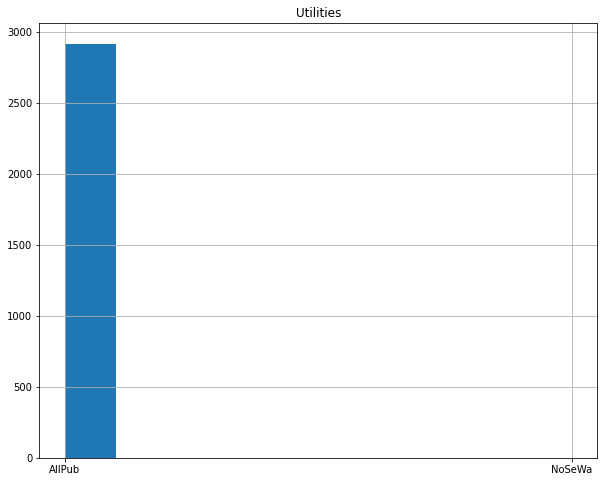

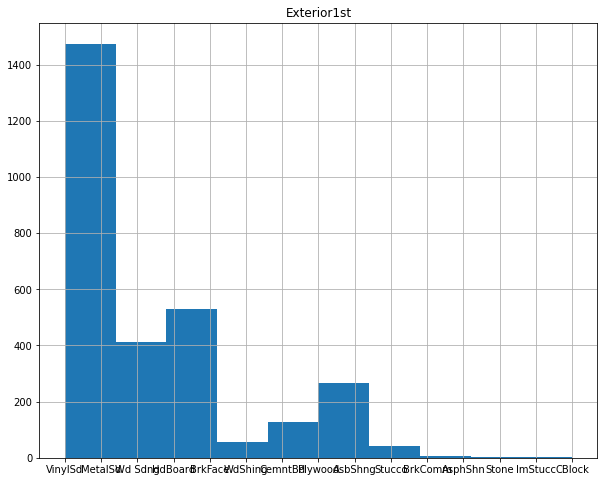

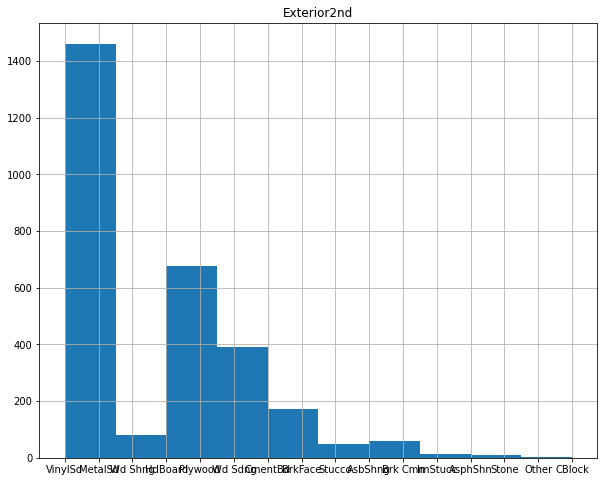

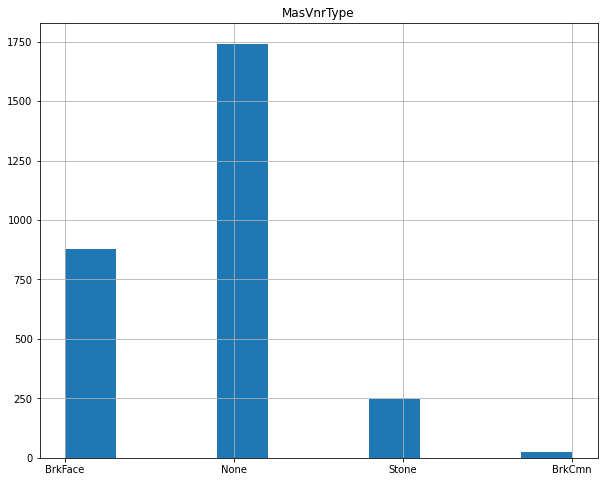

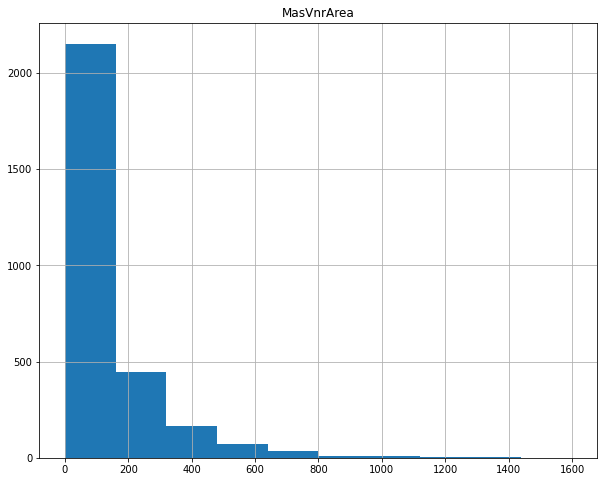

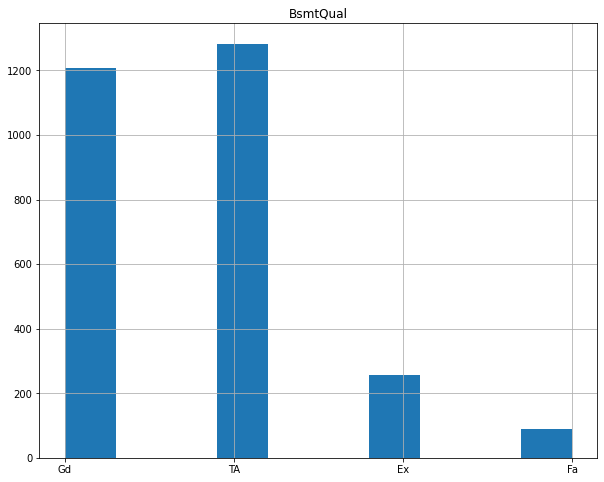

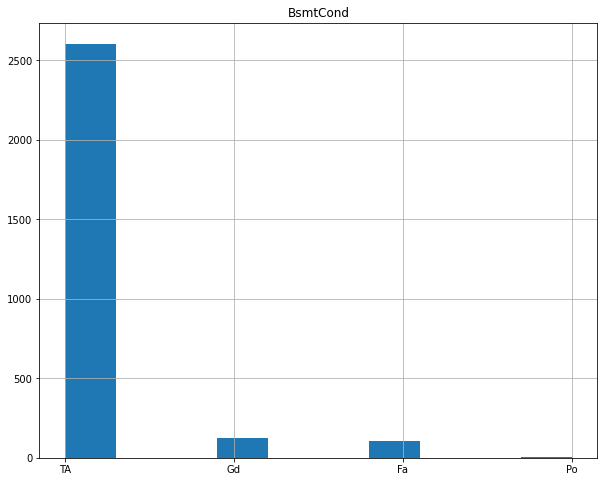

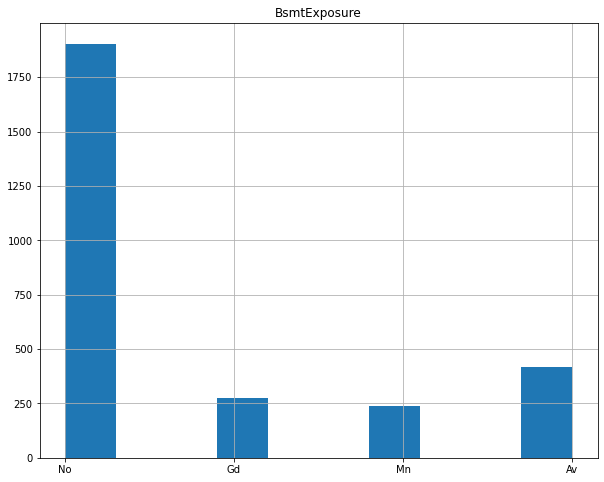

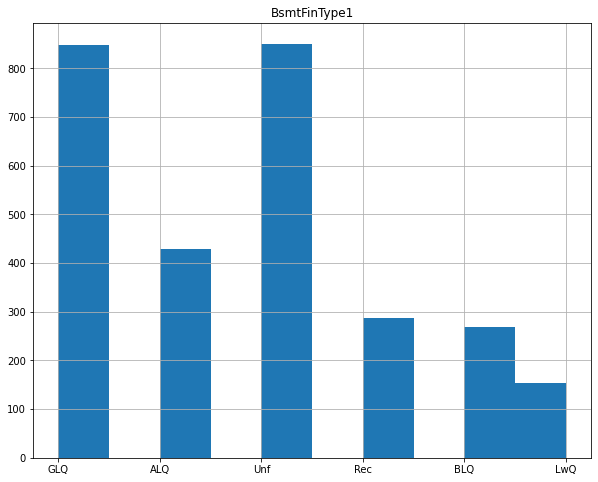

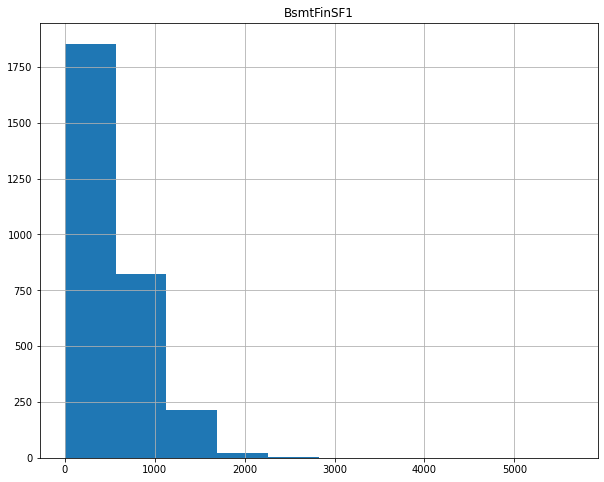

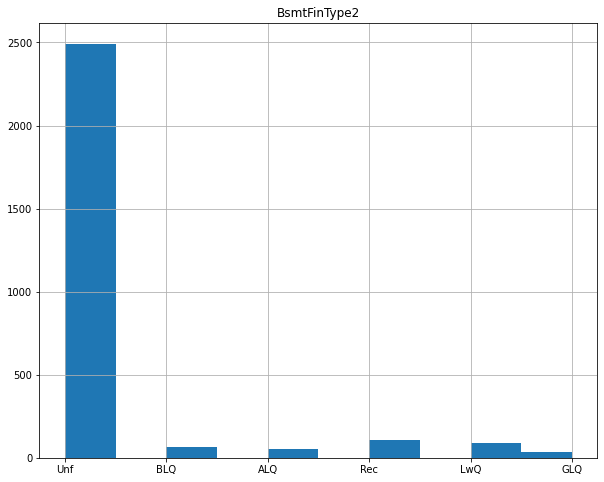

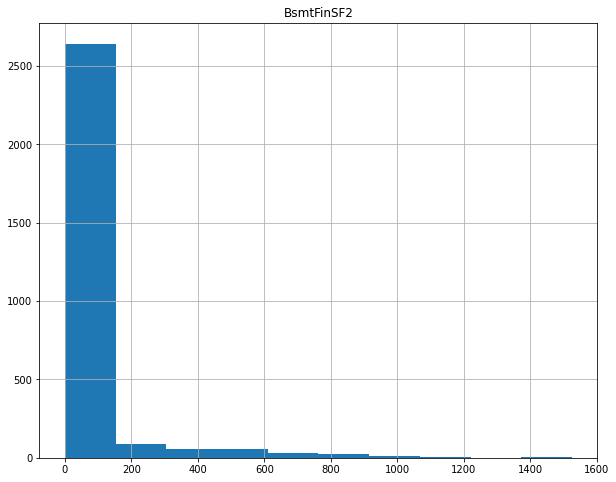

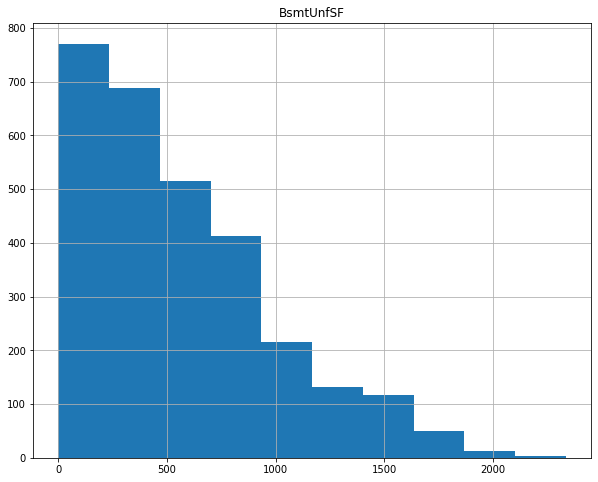

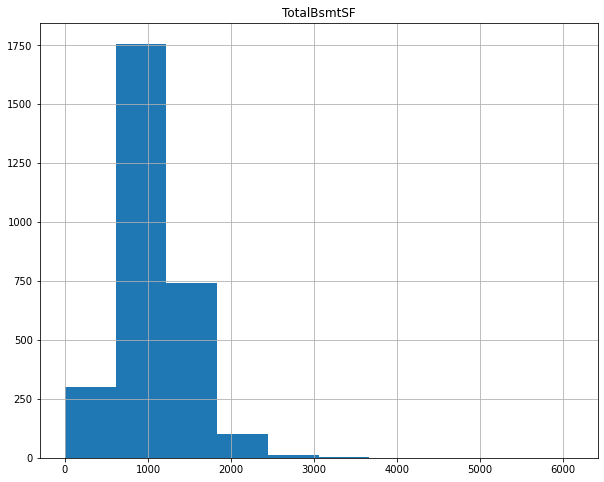

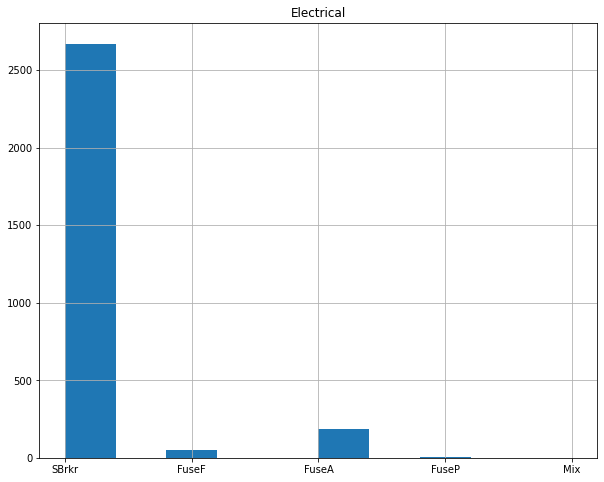

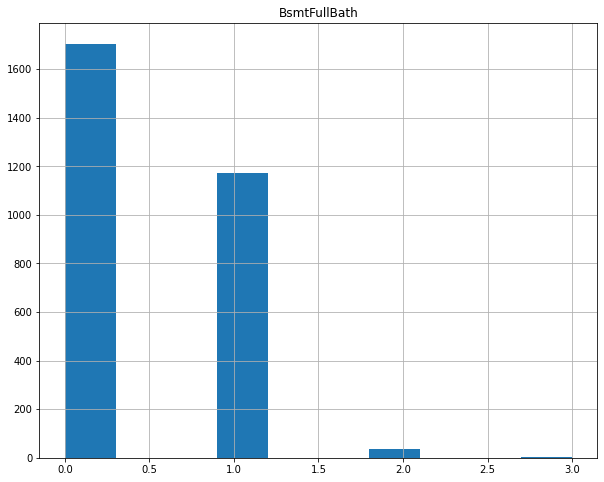

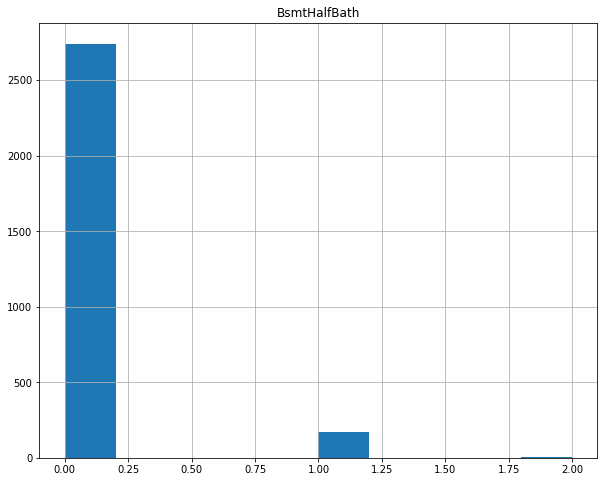

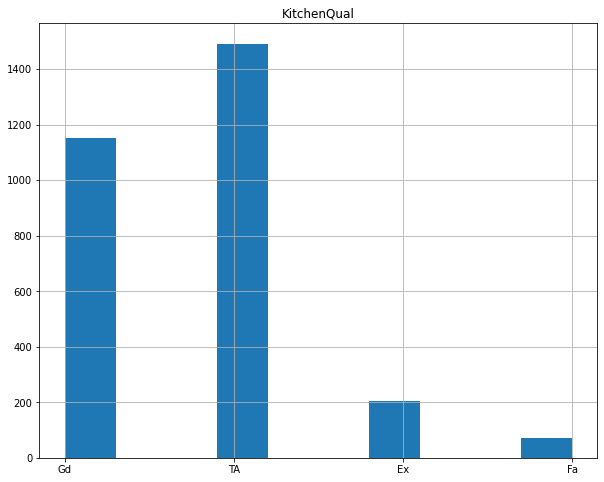

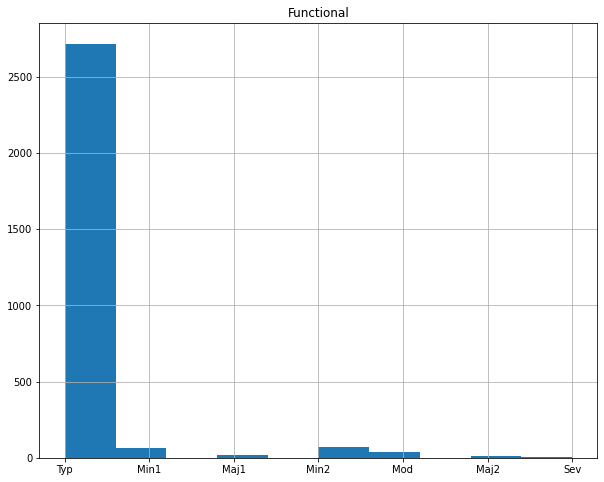

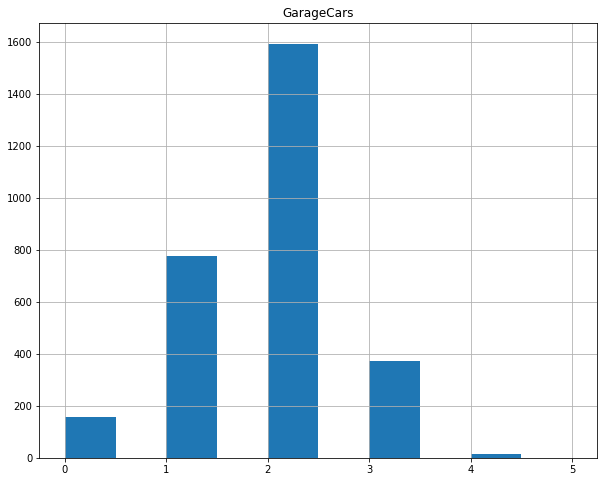

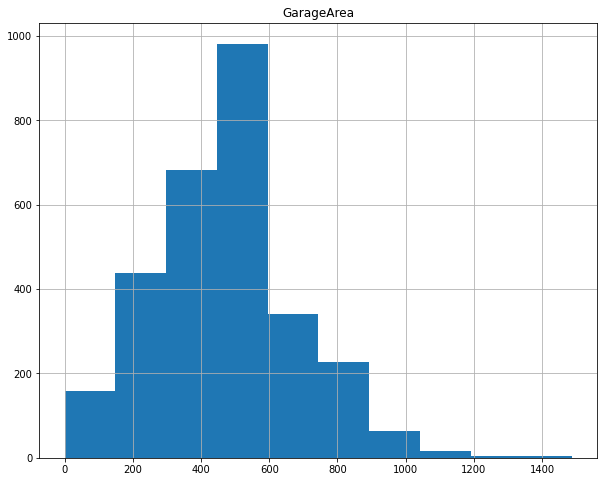

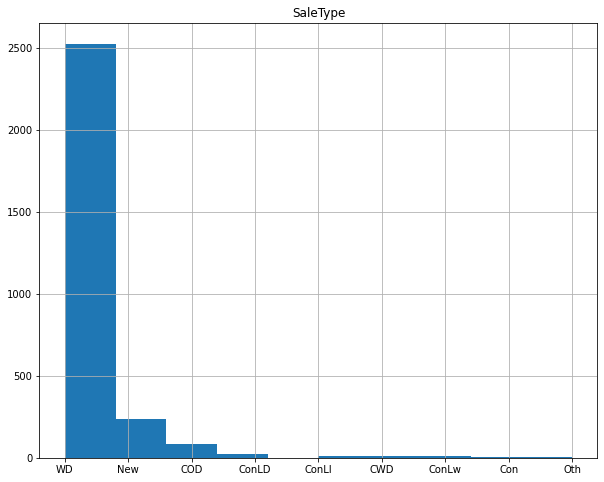

In [49]:
for c in features_to_impute:
    plt.figure(figsize=(10,8))
    All_Data[c].hist()
    plt.title(c)
    plt.show()

In [50]:
def Imput_Missing_Value(Data, features_to_impute):
    for i in features_to_impute:
        if Data[i].dtype == 'object': 
            Data[i] = Data[i].fillna(Data[i].mode()[0])
        else: 
            Data[i]=Data[i].fillna(Data[i].mean())
    return Data
All_Data = Imput_Missing_Value(All_Data, features_to_impute)
All_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotArea        2919 non-null   int64  
 3   Street         2919 non-null   object 
 4   LotShape       2919 non-null   object 
 5   LandContour    2919 non-null   object 
 6   Utilities      2919 non-null   object 
 7   LotConfig      2919 non-null   object 
 8   LandSlope      2919 non-null   object 
 9   Neighborhood   2919 non-null   object 
 10  Condition1     2919 non-null   object 
 11  Condition2     2919 non-null   object 
 12  BldgType       2919 non-null   object 
 13  HouseStyle     2919 non-null   object 
 14  OverallQual    2919 non-null   int64  
 15  OverallCond    2919 non-null   int64  
 16  YearBuilt      2919 non-null   int64  
 17  YearRemodAdd   2919 non-null   int64  
 18  RoofStyl

In [51]:
All_Data.isnull().sum().max()

0

In [52]:
corr_Matrix = Train_data.corr()
corr_Matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

<AxesSubplot:>

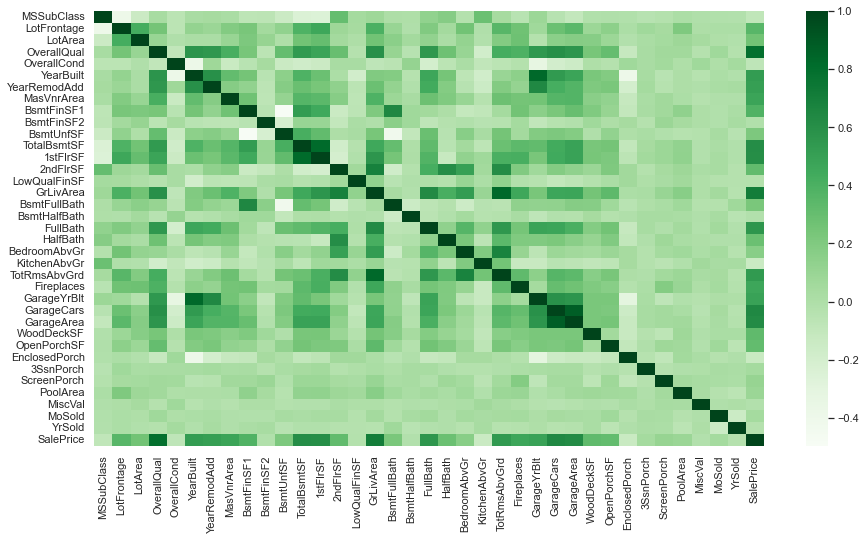

In [53]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr_Matrix,cmap="Greens")

In [54]:
Train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [55]:
Columns_Enc_OneHot = ['MSZoning' ,'LandContour' ,'LotConfig','LandSlope','RoofStyle','RoofMatl','Exterior1st','MasVnrType','Heating']
Columns_Enc_Ordinal = ['Street','LotShape','Utilities','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir','Electrical','KitchenQual','PavedDrive','SaleCondition','SaleType'] 
All_Data

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,0,2,2008,WD,Normal
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,5,2007,WD,Normal
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,0,9,2008,WD,Normal
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,0,2,2006,WD,Abnorml
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,0,0,6,2006,WD,Normal
2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,24,0,0,0,0,0,4,2006,WD,Abnorml
2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,0,0,0,0,0,9,2006,WD,Abnorml


In [64]:
All_Data = pd.concat([All_Data, housing_caterogy_onehot_encoded], axis=1)
All_Data

,MSSubClass,LotArea,Street,LotShape,Utilities,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,46,47,48,49,50,51,52,53,54,55
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,60.0,8450.0,Pave,Reg,AllPub,CollgCr,Norm,Norm,1Fam,2Story,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,20.0,9600.0,Pave,Reg,AllPub,Veenker,Feedr,Norm,1Fam,1Story,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,60.0,11250.0,Pave,IR1,AllPub,CollgCr,Norm,Norm,1Fam,2Story,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,70.0,9550.0,Pave,IR1,AllPub,Crawfor,Norm,Norm,1Fam,2Story,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160.0,1936.0,Pave,Reg,AllPub,MeadowV,Norm,Norm,Twnhs,2Story,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2916,160.0,1894.0,Pave,Reg,AllPub,MeadowV,Norm,Norm,TwnhsE,2Story,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2917,20.0,20000.0,Pave,Reg,AllPub,Mitchel,Norm,Norm,1Fam,1Story,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2918,85.0,10441.0,Pave,Reg,AllPub,Mitchel,Norm,Norm,1Fam,SFoyer,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [66]:
All_Data["Utilities"]

0          NaN
1       AllPub
2       AllPub
3       AllPub
4       AllPub
         ...  
2915    AllPub
2916    AllPub
2917    AllPub
2918    AllPub
2919    AllPub
Name: Utilities, Length: 2920, dtype: object

In [71]:
All_Data.fillna(0, inplace=True)
All_Data

,MSSubClass,LotArea,Street,LotShape,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,46,47,48,49,50,51,52,53,54,55
0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,60.0,8450.0,Pave,Reg,AllPub,7.0,5.0,2003.0,2003.0,196.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,20.0,9600.0,Pave,Reg,AllPub,6.0,8.0,1976.0,1976.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,60.0,11250.0,Pave,IR1,AllPub,7.0,5.0,2001.0,2002.0,162.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,70.0,9550.0,Pave,IR1,AllPub,7.0,5.0,1915.0,1970.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160.0,1936.0,Pave,Reg,AllPub,4.0,7.0,1970.0,1970.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2916,160.0,1894.0,Pave,Reg,AllPub,4.0,5.0,1970.0,1970.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2917,20.0,20000.0,Pave,Reg,AllPub,5.0,7.0,1960.0,1996.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2918,85.0,10441.0,Pave,Reg,AllPub,5.0,5.0,1992.0,1992.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [72]:
All_Data.info(1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2920 entries, 0 to 2919
Data columns (total 163 columns):
 #    Column         Dtype  
---   ------         -----  
 0    MSSubClass     float64
 1    LotArea        float64
 2    Street         object 
 3    LotShape       object 
 4    Utilities      object 
 5    OverallQual    float64
 6    OverallCond    float64
 7    YearBuilt      float64
 8    YearRemodAdd   float64
 9    MasVnrArea     float64
 10   ExterCond      object 
 11   Foundation     object 
 12   BsmtQual       object 
 13   BsmtCond       object 
 14   BsmtExposure   object 
 15   BsmtFinType1   object 
 16   BsmtFinSF1     float64
 17   BsmtFinType2   object 
 18   BsmtFinSF2     float64
 19   BsmtUnfSF      float64
 20   TotalBsmtSF    float64
 21   HeatingQC      object 
 22   CentralAir     object 
 23   Electrical     object 
 24   1stFlrSF       float64
 25   2ndFlrSF       float64
 26   LowQualFinSF   float64
 27   GrLivArea      float64
 28   BsmtFullBath   f

In [73]:
train_samples = len(Train_data)
train_samples

1460

In [74]:
Train_Data_new = All_Data[:train_samples]
Train_Data_new

Test_Data_new = All_Data[train_samples:]
Test_Data_new

,MSSubClass,LotArea,Street,LotShape,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,46,47,48,49,50,51,52,53,54,55
1460,20.0,9937.0,Pave,Reg,AllPub,5.0,6.0,1965.0,1965.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1461,20.0,11622.0,Pave,Reg,AllPub,5.0,6.0,1961.0,1961.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1462,20.0,14267.0,Pave,IR1,AllPub,6.0,6.0,1958.0,1958.0,108.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1463,60.0,13830.0,Pave,IR1,AllPub,5.0,5.0,1997.0,1998.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1464,60.0,9978.0,Pave,IR1,AllPub,6.0,6.0,1998.0,1998.0,20.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160.0,1936.0,Pave,Reg,AllPub,4.0,7.0,1970.0,1970.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2916,160.0,1894.0,Pave,Reg,AllPub,4.0,5.0,1970.0,1970.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2917,20.0,20000.0,Pave,Reg,AllPub,5.0,7.0,1960.0,1996.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2918,85.0,10441.0,Pave,Reg,AllPub,5.0,5.0,1992.0,1992.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [75]:
Train_Data_new

,MSSubClass,LotArea,Street,LotShape,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,46,47,48,49,50,51,52,53,54,55
0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,60.0,8450.0,Pave,Reg,AllPub,7.0,5.0,2003.0,2003.0,196.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,20.0,9600.0,Pave,Reg,AllPub,6.0,8.0,1976.0,1976.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,60.0,11250.0,Pave,IR1,AllPub,7.0,5.0,2001.0,2002.0,162.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,70.0,9550.0,Pave,IR1,AllPub,7.0,5.0,1915.0,1970.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,20.0,7500.0,Pave,Reg,AllPub,7.0,5.0,2004.0,2005.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1456,60.0,7917.0,Pave,Reg,AllPub,6.0,5.0,1999.0,2000.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1457,20.0,13175.0,Pave,Reg,AllPub,6.0,6.0,1978.0,1988.0,119.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1458,70.0,9042.0,Pave,Reg,AllPub,7.0,9.0,1941.0,2006.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [76]:
Test_Data_new.isnull().sum().max()

0

In [77]:
Train_data_Y = Train_data[['SalePrice']].reset_index().drop('Id',axis=1)
Train_data_Y.index = np.arange(1, len(Train_Data_new)+1)   
Train_data_Y

,SalePrice
1,208500
2,181500
3,223500
4,140000
5,250000
...,...
1456,175000
1457,210000
1458,266500
1459,142125


In [78]:
Train_Data_new = pd.concat([Train_Data_new, Train_data_Y],axis=1)
Train_Data_new

,MSSubClass,LotArea,Street,LotShape,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,47,48,49,50,51,52,53,54,55,SalePrice
0,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
1,60.0,8450.0,Pave,Reg,AllPub,7.0,5.0,2003.0,2003.0,196.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,208500.0
2,20.0,9600.0,Pave,Reg,AllPub,6.0,8.0,1976.0,1976.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,181500.0
3,60.0,11250.0,Pave,IR1,AllPub,7.0,5.0,2001.0,2002.0,162.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,223500.0
4,70.0,9550.0,Pave,IR1,AllPub,7.0,5.0,1915.0,1970.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,140000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60.0,7917.0,Pave,Reg,AllPub,6.0,5.0,1999.0,2000.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,175000.0
1457,20.0,13175.0,Pave,Reg,AllPub,6.0,6.0,1978.0,1988.0,119.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,210000.0
1458,70.0,9042.0,Pave,Reg,AllPub,7.0,9.0,1941.0,2006.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,266500.0
1459,20.0,9717.0,Pave,Reg,AllPub,5.0,6.0,1950.0,1996.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,142125.0


In [86]:
Train, Test = train_test_split(Train_Data_new, test_size=0.2, random_state=42)
Train_y = Train['SalePrice'] 
Train_x = Train.drop(['SalePrice'], axis=1)
Test_y = Test['SalePrice'] 
Test_x = Test.drop(['SalePrice'], axis=1)
corr_Matrix = Train_Data_new.corr()
corr_Matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790972
GrLivArea        0.708584
GarageCars       0.640383
GarageArea       0.623385
                   ...   
0               -0.047964
OverallCond     -0.077754
MSSubClass      -0.084563
EnclosedPorch   -0.128695
KitchenAbvGr    -0.135979
Name: SalePrice, Length: 147, dtype: float64